In [1]:
import json
import pandas as pd
import numpy as np

df = pd.read_csv("./data/stars_final.csv",index_col=0)
df.starred_at = pd.to_datetime(df.starred_at)
df.created_at = pd.to_datetime(df.created_at)
df.updated_at = pd.to_datetime(df.updated_at)
df.pushed_at = pd.to_datetime(df.pushed_at)
df.topics = [eval(a) for a in df.topics.array]

print(df.columns)
df = df[[
    "id","name","full_name","private","html_url",
    "starred_at",
    "created_at","updated_at", "pushed_at","homepage",
    "size","stargazers_count","watchers_count","language","forks_count",
    "description","topics","visibility","forks","watchers",]]
df.head()

Index(['id', 'node_id', 'name', 'full_name', 'private', 'html_url',
       'description', 'fork', 'url', 'forks_url',
       ...
       'license.spdx_id', 'license.url', 'license.node_id',
       'permissions.admin', 'permissions.maintain', 'permissions.push',
       'permissions.triage', 'permissions.pull', 'license', 'starred_at'],
      dtype='object', length=107)


,id,name,full_name,private,html_url,starred_at,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,forks_count,description,topics,visibility,forks,watchers
0,365005377,btop,aristocratos/btop,False,https://github.com/aristocratos/btop,2023-07-10 08:36:16+00:00,2021-05-06 18:40:21+00:00,2023-07-10 13:14:49+00:00,2023-07-05 11:23:29+00:00,NaN,8343,12279,12279,C++,398,A monitor of resources,[],public,398,12279
1,401561230,challenge100-codingtest-study,ellynhan/challenge100-codingtest-study,False,https://github.com/ellynhan/challenge100-codin...,2023-07-10 06:38:43+00:00,2021-08-31 03:30:36+00:00,2023-07-10 06:38:43+00:00,2023-07-10 02:33:08+00:00,NaN,6224,126,126,C++,87,누구나 참여 가능한 알고리즘 코딩테스트 문제풀이 스터디 - 깃헙 잔디 채워봅시다!,"[algorithms-and-data-structures, codingtest, p...",public,87,126
2,320135333,aws-mysql-jdbc,awslabs/aws-mysql-jdbc,False,https://github.com/awslabs/aws-mysql-jdbc,2023-07-09 02:57:22+00:00,2020-12-10 02:21:58+00:00,2023-07-09 02:57:23+00:00,2023-07-08 01:38:12+00:00,https://awslabs.github.io/aws-mysql-jdbc/,6805,186,186,Java,46,The Amazon Web Services (AWS) JDBC Driver for ...,"[aws-jdbc-driver, java, jdbc, mysql, mysql-con...",public,46,186
3,13404515,HikariCP,brettwooldridge/HikariCP,False,https://github.com/brettwooldridge/HikariCP,2023-07-09 02:17:05+00:00,2013-10-08 05:43:03+00:00,2023-07-10 02:25:43+00:00,2023-07-07 10:10:53+00:00,NaN,4649,18408,18408,Java,2776,"光 HikariCP・A solid, high-performance, JDBC con...","[connection-pool, high-performance, java, jdbc]",public,2776,18408
4,323968067,Number_Theory_in_CP_PS,rkm0959/Number_Theory_in_CP_PS,False,https://github.com/rkm0959/Number_Theory_in_CP_PS,2023-07-08 11:51:58+00:00,2020-12-23 17:52:55+00:00,2023-07-08 11:51:58+00:00,2021-03-29 04:34:29+00:00,NaN,87,142,142,C++,4,"CP, PS 정수론을 위한 가이드","[competitive-programming, number-theory]",public,4,142


In [2]:
# Full topics dataframe
# all_topics = set(df["topics"].explode().to_list())
# print(all_topics)

# aaa_df = pd.get_dummies(df.topics)

## Graph by Starred chronological order 

In [3]:
def get_topics_cnt(df):
    all_topics = []
    for arr in df["topics"]:
        all_topics.extend(arr)
    topics = set(all_topics)
    # print(len(all_topics), len(topics))

    topics_cnt = [(t, all_topics.count(t)) for t in topics]
    topics_cnt = (pd.DataFrame(topics_cnt, columns=["topic","count"])
                    .sort_values(by="count", ascending=False))
    topics_cnt = topics_cnt.loc[topics_cnt["count"]>=10]
    # topics_cnt.loc[topics_cnt["count"]<20,"topic"] = "misc"
    return topics_cnt

topics_cnt = get_topics_cnt(df)
topics_cnt

,topic,count
1120,python,58
1474,hacktoberfest,36
1498,machine-learning,24
657,linux,23
1202,awesome,22
705,cli,20
288,terminal,20
1147,awesome-list,17
675,deep-learning,16
74,vim,16


In [4]:
import plotly.express as px
topics_cnt_np = np.array(topics_cnt).T

fig = px.pie(topics_cnt["topic"], title="Distribution by popular tags",
              names=topics_cnt_np[0], values=topics_cnt_np[1])
fig.show()

## Visualize Numerical data

In [5]:
import matplotlib.pyplot as plt

num_df = df[["name","created_at","size","stargazers_count","forks_count"]].sort_values(by="created_at")
num_df

,name,created_at,size,stargazers_count,forks_count
44,tty-clock,2008-06-08 23:25:04+00:00,176,750,110
83,faker,2008-12-24 17:20:37+00:00,12914,10831,3124
25,oocss,2009-01-28 02:13:19+00:00,5287,6251,741
23,todo.txt-cli,2009-03-06 01:33:34+00:00,5754,5240,681
39,ranger,2009-06-04 06:41:11+00:00,10493,13653,849
...,...,...,...,...,...
29,hn-recommendation-api,2023-06-13 15:59:18+00:00,147,67,6
20,open-resume,2023-06-24 06:06:30+00:00,1906,3198,202
17,chathn,2023-06-25 17:39:39+00:00,400,779,268
7,tinyvector,2023-07-01 00:59:09+00:00,180,599,23


In [6]:
num_df["created_at"] = pd.to_datetime(num_df["created_at"])
num_df["created_yy"] = num_df.created_at.dt.year
num_df["created_mm"] = num_df.created_at.dt.month
num_df["created_yymm"] = num_df.created_at.apply(lambda d: str(d.year)+'-'+str(d.month))

num_df

,name,created_at,size,stargazers_count,forks_count,created_yy,created_mm,created_yymm
44,tty-clock,2008-06-08 23:25:04+00:00,176,750,110,2008,6,2008-6
83,faker,2008-12-24 17:20:37+00:00,12914,10831,3124,2008,12,2008-12
25,oocss,2009-01-28 02:13:19+00:00,5287,6251,741,2009,1,2009-1
23,todo.txt-cli,2009-03-06 01:33:34+00:00,5754,5240,681,2009,3,2009-3
39,ranger,2009-06-04 06:41:11+00:00,10493,13653,849,2009,6,2009-6
...,...,...,...,...,...,...,...,...
29,hn-recommendation-api,2023-06-13 15:59:18+00:00,147,67,6,2023,6,2023-6
20,open-resume,2023-06-24 06:06:30+00:00,1906,3198,202,2023,6,2023-6
17,chathn,2023-06-25 17:39:39+00:00,400,779,268,2023,6,2023-6
7,tinyvector,2023-07-01 00:59:09+00:00,180,599,23,2023,7,2023-7


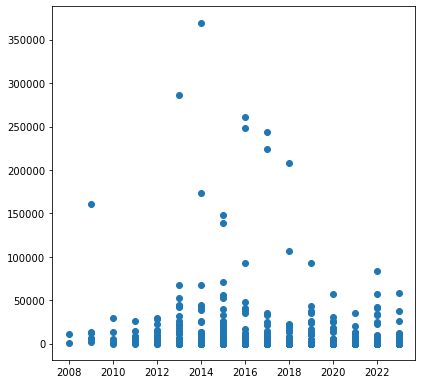

In [7]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(x=num_df["created_yy"], y=num_df["stargazers_count"])

## Number of starred repos over time

In [8]:
starred_dt = pd.to_datetime(df["starred_at"]).sort_values()

starred_dt = starred_dt.groupby(by=starred_dt.dt.date).count().cumsum()
starred_dt = pd.DataFrame(starred_dt)
starred_dt["dates"] = starred_dt.index
starred_dt["repos"] = starred_dt["starred_at"]

print(starred_dt)

fig = px.line(starred_dt, x="dates", y="repos", title="Number of starred repos over time")
fig.show()


            starred_at       dates  repos
starred_at                               
2016-11-09           1  2016-11-09      1
2016-11-11           2  2016-11-11      2
2016-11-15           5  2016-11-15      5
2016-11-17           7  2016-11-17      7
2016-11-18           8  2016-11-18      8
...                ...         ...    ...
2023-07-05         623  2023-07-05    623
2023-07-07         626  2023-07-07    626
2023-07-08         627  2023-07-08    627
2023-07-09         629  2023-07-09    629
2023-07-10         631  2023-07-10    631

[346 rows x 3 columns]


## Top k topics (and its repositories)

In [9]:
k = 5
top_k_topics = topics_cnt.head(k)["topic"].tolist()
print(top_k_topics)

['python', 'hacktoberfest', 'machine-learning', 'linux', 'awesome']


In [10]:
# for topic in top_k_topics:
    # display(df.query("@topic in topics.array.tolist()").head())
# df.query("topics.find('python')")

## What am I interested in now?
- A lot of python and typescript, apparently...

In [11]:
from datetime import date, timedelta

prev30 = df[df.starred_at.dt.date > date.today()-timedelta(days=30)]
prev30.tail()

,id,name,full_name,private,html_url,starred_at,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,forks_count,description,topics,visibility,forks,watchers
37,138331573,NLP-progress,sebastianruder/NLP-progress,False,https://github.com/sebastianruder/NLP-progress,2023-06-14 09:20:30+00:00,2018-06-22 17:43:55+00:00,2023-07-10 16:50:59+00:00,2023-06-22 13:55:48+00:00,https://nlpprogress.com/,1345,21753,21753,Python,3574,Repository to track the progress in Natural La...,"[dialogue, machine-learning, machine-translati...",public,3574,21753
38,9118195,keyboard,jasonrudolph/keyboard,False,https://github.com/jasonrudolph/keyboard,2023-06-14 07:36:57+00:00,2013-03-30 16:01:43+00:00,2023-07-10 16:58:59+00:00,2022-07-25 00:38:52+00:00,NaN,3326,1995,1995,Lua,214,⌨ Toward a more useful keyboard,"[caps-lock, hammerspoon, hjkl, karabiner, keyb...",public,214,1995
39,229293932,AwesomeKorean_Data,songys/AwesomeKorean_Data,False,https://github.com/songys/AwesomeKorean_Data,2023-06-13 02:07:14+00:00,2019-12-20 15:58:01+00:00,2023-07-10 09:03:34+00:00,2023-06-25 08:54:53+00:00,NaN,1663,631,631,NaN,88,한국어 데이터 세트 링크,[],public,88,631
40,178626720,lightning,Lightning-AI/lightning,False,https://github.com/Lightning-AI/lightning,2023-06-13 01:46:48+00:00,2019-03-31 00:45:57+00:00,2023-07-10 17:23:57+00:00,2023-07-10 18:08:12+00:00,https://lightning.ai,124189,23989,23989,Python,2960,"Deep learning framework to train, deploy, and ...","[ai, artificial-intelligence, data-science, de...",public,2960,23989
41,230885748,authentik,goauthentik/authentik,False,https://github.com/goauthentik/authentik,2023-06-12 14:53:13+00:00,2019-12-30 09:19:48+00:00,2023-07-10 13:42:25+00:00,2023-07-10 13:33:20+00:00,https://goauthentik.io,223407,4194,4194,Python,333,The authentication glue you need.,"[authentication, authentik, authorization, hac...",public,333,4194


Text(0, 0.5, 'count')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.


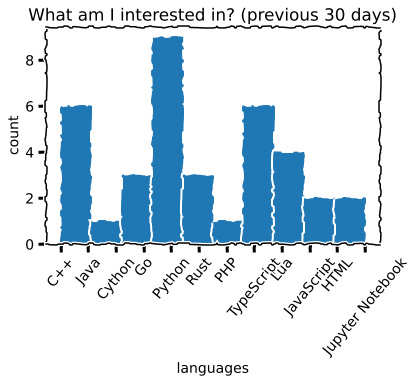

In [12]:
langs = prev30["language"].dropna()
plt.xkcd(randomness=42)
plt.title("What am I interested in? (previous 30 days)")
plt.hist(x=langs)
plt.xticks(rotation=50)
plt.xlabel("languages")
plt.ylabel("count")